<a href="https://colab.research.google.com/github/sinjoo83/Python_practice/blob/main/Air_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [87]:
df=pd.read_csv("air_polution.csv")

In [88]:
df.head(2)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29 – 13.74],NaN,NaN,EN,2022-08-11T23:00:00.000Z
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44 – 12.55],NaN,NaN,EN,2022-08-11T23:00:00.000Z


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9450 entries, 0 to 9449
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               9450 non-null   object 
 1   Indicator                   9450 non-null   object 
 2   ValueType                   9450 non-null   object 
 3   ParentLocationCode          9450 non-null   object 
 4   ParentLocation              9450 non-null   object 
 5   Location type               9450 non-null   object 
 6   SpatialDimValueCode         9450 non-null   object 
 7   Location                    9450 non-null   object 
 8   Period type                 9450 non-null   object 
 9   Period                      9450 non-null   int64  
 10  IsLatestYear                9450 non-null   bool   
 11  Dim1 type                   9450 non-null   object 
 12  Dim1                        9450 non-null   object 
 13  Dim1ValueCode               9450 

In [90]:
df.isnull().sum()

IndicatorCode                    0
Indicator                        0
ValueType                        0
ParentLocationCode               0
ParentLocation                   0
Location type                    0
SpatialDimValueCode              0
Location                         0
Period type                      0
Period                           0
IsLatestYear                     0
Dim1 type                        0
Dim1                             0
Dim1ValueCode                    0
Dim2 type                     9450
Dim2                          9450
Dim2ValueCode                 9450
Dim3 type                     9450
Dim3                          9450
Dim3ValueCode                 9450
DataSourceDimValueCode        9450
DataSource                    9450
FactValueNumericPrefix        9450
FactValueNumeric                 0
FactValueUoM                  9450
FactValueNumericLowPrefix     9450
FactValueNumericLow              0
FactValueNumericHighPrefix    9450
FactValueNumericHigh

In [91]:
df=df.rename(columns={"ParentLocation":"Continent"})
df=df.rename(columns={"Dim1":"Area Type"})

In [92]:
columns_to_keep=["Continent","Period","Location","Dim1","FactValueNumeric"]
columns_to_drop = set(df.columns) - set(columns_to_keep)
df.drop(columns=columns_to_drop, inplace=True)

In [93]:
df_2019=df[df["Period"]==2019]

df_2019["Period"].count()

945

In [94]:
df_location=df_2019.groupby("Location", as_index=False)

In [95]:
df_location=df_location["FactValueNumeric"].mean()

In [96]:
df_location=df_location.sort_values(by=["FactValueNumeric"],ascending=False)

In [97]:
df_location_top_30=df_location[df_location["FactValueNumeric"]>38]

In [98]:
df_location_top_30

,Location,FactValueNumeric
0,Afghanistan,68.038
91,Kuwait,62.180
53,Egypt,59.936
151,Saudi Arabia,59.114
30,Cameroon,58.770
139,Qatar,57.524
125,Nigeria,55.606
170,Tajikistan,55.506
124,Niger,52.924
12,Bahrain,52.622


In [99]:
import plotly.express as px
fig = px.bar(df_location_top_30, x='Location', y='FactValueNumeric', title='Top 30 countries with the worst air quality')
fig.show()

In [100]:
fig = px.scatter(df_location_top_30, x='Location', y='FactValueNumeric', size='FactValueNumeric',
                 title='Top 30 countries with the worst air quality')

fig.update_layout(yaxis_title="Air pollution", xaxis_title="Country")
fig.show()

In [101]:
df_location2=df_location.sort_values(by=["FactValueNumeric"],ascending=True)

In [102]:
df_location2

,Location,FactValueNumeric
11,Bahamas,5.196
61,Finland,5.834
77,Iceland,6.034
167,Sweden,6.086
31,Canada,6.264
...,...,...
30,Cameroon,58.770
151,Saudi Arabia,59.114
53,Egypt,59.936
91,Kuwait,62.180


In [103]:
df_location2_top_30=df_location[df_location["FactValueNumeric"]<=8.616]

df_location2_top_30

,Location,FactValueNumeric
122,New Zealand,8.6160
3,Andorra,8.5600
187,Uruguay,8.4580
82,Ireland,8.3480
5,Antigua and Barbuda,8.3150
159,Solomon Islands,8.2660
50,Dominica,8.2125
111,Micronesia (Federated States of),7.9400
131,Palau,7.8675
148,Samoa,7.8650


In [104]:
fig = px.bar(df_location2_top_30, x='Location', y='FactValueNumeric', title='Top 30 countries with the best air quality')
fig.show()

In [105]:
df_location2_top_30=df_location2_top_30.sort_values(by=["FactValueNumeric"],ascending=True)

In [106]:
df_location2_top_30

,Location,FactValueNumeric
11,Bahamas,5.1960
61,Finland,5.8340
77,Iceland,6.0340
167,Sweden,6.0860
31,Canada,6.2640
57,Estonia,6.3980
126,Niue,6.7400
127,Norway,6.7540
179,Tuvalu,6.8100
119,Nauru,6.9175


In [107]:
fig = px.scatter(df_location2_top_30, x='Location', y='FactValueNumeric', size='FactValueNumeric',
                 title='Top 30 countries with the best air quality')

fig.update_layout(yaxis_title="Air pollution", xaxis_title="Country")
fig.show()

In [108]:
df_life=pd.read_csv("Life_expectancy_at_birth.csv")

In [109]:
df_life=df_life.rename(columns={"ParentLocation":"Continent"})
df_life=df_life.rename(columns={"Dim1":"Sex"})

In [110]:
columns_to_keep=["Indicator","Continent","Period","Location","Sex","FactValueNumeric"]
columns_to_drop = set(df_life.columns) - set(columns_to_keep)
df_life.drop(columns=columns_to_drop, inplace=True)

In [111]:
df_life_2019=df_life[df_life["Period"]==2019]

df_life_2019["Period"].count()

549

In [112]:
df_life_location=df_life_2019.groupby("Location", as_index=False)

df_life_location=df_life_location["FactValueNumeric"].mean()



In [115]:
df_location=df_location.rename(columns={"FactValueNumeric":"Air_pollution"})

df_life_location=df_life_location.rename(columns={"FactValueNumeric":"Life_expectancy"})



In [124]:
df_life_location

,Location,Life_expectancy
0,Afghanistan,63.220000
1,Albania,78.053333
2,Algeria,77.160000
3,Angola,63.093333
4,Antigua and Barbuda,76.430000
...,...,...
178,Venezuela (Bolivarian Republic of),74.010000
179,Viet Nam,73.803333
180,Yemen,66.653333
181,Zambia,62.453333


In [114]:
df_location

,Location,Air_pollution
0,Afghanistan,68.038
91,Kuwait,62.180
53,Egypt,59.936
151,Saudi Arabia,59.114
30,Cameroon,58.770
...,...,...
31,Canada,6.264
167,Sweden,6.086
77,Iceland,6.034
61,Finland,5.834


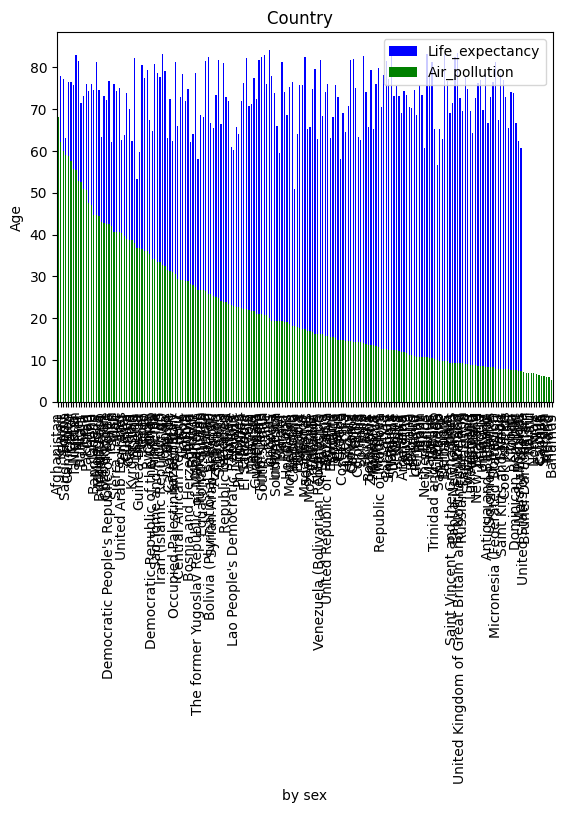

In [126]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a single set of axes
fig, ax = plt.subplots()

# Plot Y1 from DataFrame 1 on the axes
df_life_location.plot(x='Location', y='Life_expectancy', kind='bar',color='blue', ax=ax, label='Life_expectancy')

# Plot Y2 from DataFrame 2 on the same axes
df_location.plot(x='Location', y='Air_pollution', kind='bar',color='green', ax=ax, label='Air_pollution')

# Set plot title and labels
ax.set_title('Country  ')
ax.set_xlabel('by sex')
ax.set_ylabel('Age')

# Show the legend to differentiate the DataFrames
ax.legend()

# Show the plot
plt.show()

In [129]:
combined_df=pd.read_csv("combined_life_air.csv")

In [135]:
combined_df.head(32)

,Location,Life_expectancy,Air_pollution
0,Afghanistan,63.220000,68.038
1,Albania,78.053333,16.322
2,Algeria,77.160000,22.680
3,Angola,63.093333,28.890
4,Antigua and Barbuda,76.430000,8.315
5,Argentina,76.530000,11.832
6,Armenia,75.893333,34.056
7,Australia,83.043333,8.852
8,Austria,81.623333,11.768
9,Azerbaijan,71.433333,25.130


In [152]:
combined_df_top_10=combined_df[combined_df["Air_pollution"]>51]
combined_df_worst_air_10=combined_df_top_10.sort_values(by=["Air_pollution"],ascending=False)
combined_df_worst_air_10

,Location,Life_expectancy,Air_pollution
0,Afghanistan,63.220000,68.038
88,Kuwait,81.390000,62.180
50,Egypt,71.850000,59.936
140,Saudi Arabia,74.523333,59.114
29,Cameroon,62.383333,58.770
130,Qatar,77.276667,57.524
119,Nigeria,62.640000,55.606
159,Tajikistan,69.543333,55.506
118,Niger,63.303333,52.924
11,Bahrain,75.956667,52.622


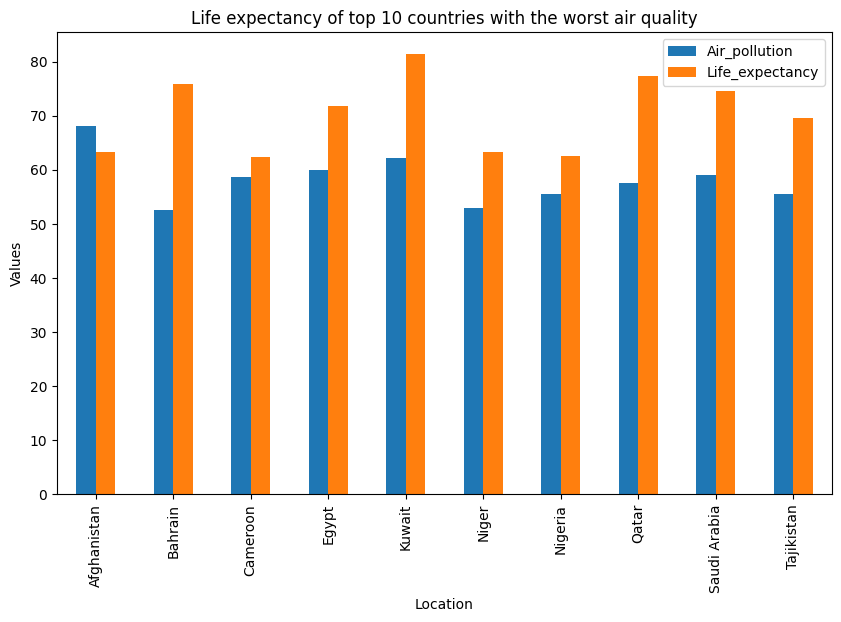

In [154]:
# Create a pivot table with multi-level index
pivot_df =combined_df_worst_air_10.pivot_table(index=['Location'], values=['Life_expectancy', 'Air_pollution'])

# Plot the bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))

# Set plot title and labels
plt.title('Life expectancy of top 10 countries with the worst air quality')
plt.xlabel('Location')
plt.ylabel('Values')

# Show the plot
plt.show()

In [155]:
combined_df_top_10_good=combined_df[combined_df["Air_pollution"]<7.4]
combined_df_best_air_10=combined_df_top_10_good.sort_values(by=["Air_pollution"],ascending=True)
combined_df_best_air_10

,Location,Life_expectancy,Air_pollution
10,Bahamas,73.216667,5.196
58,Finland,81.603333,5.834
74,Iceland,82.336667,6.034
156,Sweden,82.400000,6.086
30,Canada,82.230000,6.264
54,Estonia,78.726667,6.398
120,Norway,82.610000,6.754
23,Brunei Darussalam,74.356667,6.934
174,United States of America,78.503333,7.136
129,Portugal,81.510000,7.364


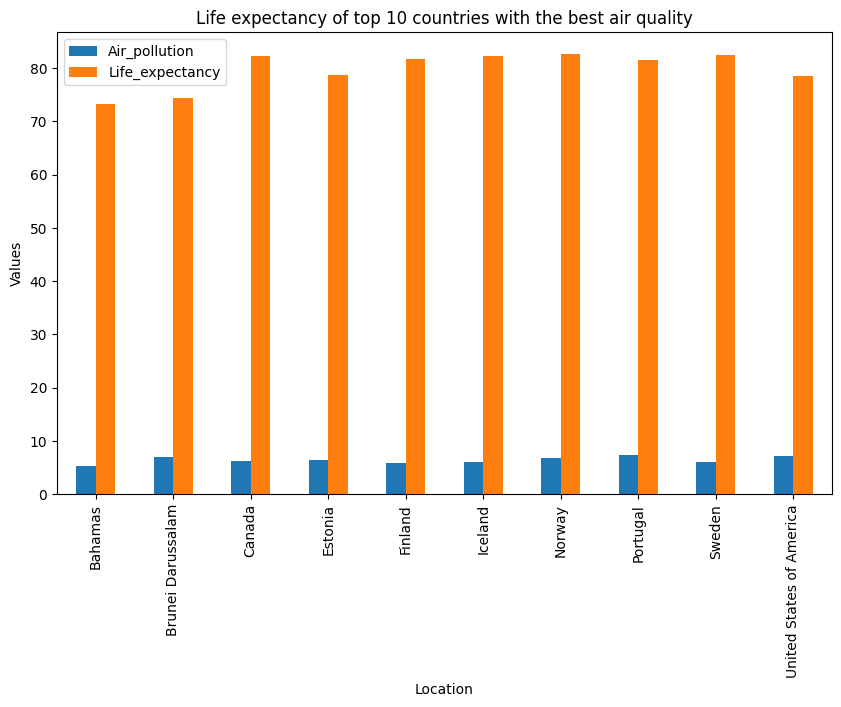

In [156]:
# Create a pivot table with multi-level index
pivot_df =combined_df_best_air_10.pivot_table(index=['Location'], values=['Life_expectancy', 'Air_pollution'])

# Plot the bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))

# Set plot title and labels
plt.title('Life expectancy of top 10 countries with the best air quality')
plt.xlabel('Location')
plt.ylabel('Values')

# Show the plot
plt.show()